In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Reading excel file
ds = pd.read_excel('C:/Users/Hp/Desktop/Customer_retention_dataset/customer_retention_dataset.xlsx', sheet_name='codedsheet')
.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      
3                                                  4                                                      
4                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        
3                                                  3                                                        
4                                                  3                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in        
1  ...                            Amazon.in, Flipkart.com        
2  ...                                         Myntra.com        
3  ...          

In [3]:
# Checking the initial shape of the dataset as how many rows and columns are present in it
ds.shape

(269, 71)

In [4]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (269, 71)
Shape of dataset after removing duplicates:  (139, 71)


In [5]:
# Checking the columns of the dataset
ds.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [6]:
# Renaming columns
ds.rename(columns={"1Gender of respondent": "Gndr respondent", "2 How old are you? ": "Age",
                  "3 Which city do you shop online from?": "City shop",
                   "4 What is the Pin Code of where you shop online from?":"PinCode", 
                   "5 Since How Long You are Shopping Online ?":"Shopping period",
                  "6 How many times you have made an online purchase in the past 1 year?": "Year purchase frq",
                  "7 How do you access the internet while shopping on-line?":"Internet access", 
                  "8 Which device do you use to access the online shopping?":"Device shopping",
                  "9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ":"Screen mobile",
                  "10 What is the operating system (OS) of your device?\t\t\t\t                                          ":"OS device",
                  "11 What browser do you run on your device to access the website?\t\t\t                                                          ":"Browser",
                  "12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ":"Channel",
                  "13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ":"Next visit",
                  "14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ":"Explore time",
                  "15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ":"Prefered Payment",
                  "16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ":"Frq abandon",
                  "17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ":"Reason abandon",
                  "18 The content on the website must be easy to read and understand":"Content understand",
                  "19 Information on similar product to the one highlighted  is important for product comparison":"Comparison info",
                  "20 Complete information on listed seller and product being offered is important for purchase decision.":"Complete info",
                  "21 All relevant information on listed products must be stated clearly":"relevant info",
                  "22 Ease of navigation in website":"Navigation",
                  "23 Loading and processing speed":"Speed",
                  "24 User friendly Interface of the website":"Interface",
                  "25 Convenient Payment methods":"Pay method",
                  "26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time":"Trust retail",
                  "27 Empathy (readiness to assist with queries) towards the customers":"Empathy",
                  "28 Being able to guarantee the privacy of the customer":"Privacy Cuarantee",
                  "29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)":"Response channel",
                  "30 Online shopping gives monetary benefit and discounts":"Discounts",
                  "31 Enjoyment is derived from shopping online":"Enjoy shop",
                  "32 Shopping online is convenient and flexible":"Covinient",
                  "33 Return and replacement policy of the e-tailer is important for purchase decision":"Return policy",
                  "34 Gaining access to loyalty programs is a benefit of shopping online":"Loyalty access",
                  "35 Displaying quality Information on the website improves satisfaction of customers":"Quality information",
                  "36 User derive satisfaction while shopping on a good quality website or application":"User satifaction",
                  "37 Net Benefit derived from shopping online can lead to users satisfaction":"Net benefit",
                  "38 User satisfaction cannot exist without trust":"User satis trust",
                  "39 Offering a wide variety of listed product in several category":"Offering product",
                  "40 Provision of complete and relevant product information":"Product information",
                  "41 Monetary savings":"Monetary savings",
                  "42 The Convenience of patronizing the online retailer":"Convinience retailer",
                  "43 Shopping on the website gives you the sense of adventure":"Shopping adventure",
                  "44 Shopping on your preferred e-tailer enhances your social status":"Social status",
                  "45 You feel gratification shopping on your favorite e-tailer":"Gratification",
                  "46 Shopping on the website helps you fulfill certain roles":"Fulfill roles",
                  "47 Getting value for money spent":"Value for money",
                  "From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ":"Tick retailer",
                  "Easy to use website or application":"Easy to use",
                  "Visual appealing web-page layout":"Visual appealing",
                  "Wild variety of product on offer":"Wild varietyP",
                  "Complete, relevant description information of products":"Description CR",
                  "Fast loading website speed of website and application":"Fast load website",
                  "Reliability of the website or application":"Reliability of web",
                  "Quickness to complete purchase":"Quickness",
                  "Availability of several payment options":"Avail pay",
                  "Privacy of customers’ information":"Privacy cust_info",
                  "Security of customer financial information":"Security cust",
                  "Presence of online assistance through multi-channel":"Online assistance",
                  "Longer time to get logged in (promotion, sales period)":"Time login",
                  "Longer time in displaying graphics and photos (promotion, sales period)":"Time display",
                  "Late declaration of price (promotion, sales period)":"Late declaration",
                  "Longer page loading time (promotion, sales period)":"Page time",
                  "Limited mode of payment on most products (promotion, sales period)":"Mode of pay",
                  "Change in website/Application design":"Change design",
                   "Frequent disruption when moving from one page to another":"Frequent disruption",
                   "Website is as efficient as before":"Website efficiency",
                   "Which of the Indian online retailer would you recommend to a friend?":"Recommend retailer",
                  }, inplace=True)

In [7]:
ds.head()

Gndr respondent  Age      City shop  PinCode  Shopping period  \
0                0    3          Delhi   110009                5   
1                1    2          Delhi   110030                5   
2                1    2  Greater Noida   201308                4   
3                0    2        Karnal    132001                4   
4                1    2     Bangalore    530068                3   

   Year purchase frq  Internet access  Device shopping  Screen mobile  \
0                  4                4                3              5   
1                  5                2                1              2   
2                  5                3                1              4   
3                  1                3                1              4   
4                  2                2                1              2   

   OS device  ...               Time login              Time display  \
0          1  ...                Amazon.in                 Amazon.in   
1          3  ...  Amazon.in, Flipkart.com                Myntra.com   
2          2  ...               Myntra.com                Myntra.com   
3          3  ...             Snapdeal.com  Myntra.com, Snapdeal.com   
4          3  ...  Flipkart.com, Paytm.com                 Paytm.com   

   Late declaration     Page time   Mode of pay  Longer delivery period  \
0      Flipkart.com  Flipkart.com     Amazon.in               Paytm.com   
1      snapdeal.com  Snapdeal.com  Snapdeal.com            Snapdeal.com   
2        Myntra.com    Myntra.com     Amazon.in               Paytm.com   
3        Myntra.com     Paytm.com     Paytm.com               Paytm.com   
4         Paytm.com     Paytm.com  Snapdeal.com               Paytm.com   

             Change design      Frequent disruption  \
0             Flipkart.com                Amazon.in   
1                Amazon.in               Myntra.com   
2                Paytm.com                Paytm.com   
3  Amazon.in, Flipkart.com  Amazon.in, Flipkart.com   
4                Amazon.in             Snapdeal.com   

                   Website efficiency                Recommend retailer  
0                           Amazon.in                      Flipkart.com  
1             Amazon.in, Flipkart.com             Amazon.in, Myntra.com  
2                           Amazon.in  Amazon.in, Paytm.com, Myntra.com  
3  Amazon.in, Flipkart.com, Paytm.com           Amazon.in, Flipkart.com  
4                           Paytm.com             Amazon.in, Myntra.com  

[5 rows x 71 columns]

In [8]:
# Checking the datatypes of the columns
ds.dtypes

Gndr respondent            int64
Age                        int64
City shop                 object
PinCode                    int64
Shopping period            int64
                           ...  
Longer delivery period    object
Change design             object
Frequent disruption       object
Website efficiency        object
Recommend retailer        object
Length: 71, dtype: object

In [9]:
# Checking the columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 242
Data columns (total 71 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                         --------------  ----- 
 0   Gndr respondent                                                                                                                                                139 non-null    int64 
 1   Age                                                                                                                                                            139 non-null    int64 
 2   City shop                                                                                                                                     

In [10]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32', 'float'])
ds_int.columns

Index(['Gndr respondent', 'Age', 'PinCode', 'Shopping period',
       'Year purchase frq', 'Internet access', 'Device shopping',
       'Screen mobile', 'OS device', 'Browser', 'Channel', 'Next visit',
       'Explore time', 'Prefered Payment',
       '16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
       'Reason abandon', 'Content understand', 'Comparison info',
       'Complete info', 'relevant info', 'Navigation', 'Speed', 'Interface',
       'Pay method', 'Trust retail', 'Empathy', 'Privacy Cuarantee',
       'Response channel', 'Discounts', 'Enjoy shop', 'Covinient',
       'Return policy', 'Loyalty access', 'Quality information',
       'User satifaction', 'Net benefit', 'User satis trust',
       'Offering product', 'Product information', 'Monetary savings',
       'Convinience retailer', 'Shopping adventure', 'Social status',
       'Gratification', 'Fulfill r

In [11]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['City shop', 'Tick retailer', 'Easy to use', 'Visual appealing',
       'Wild varietyP', 'Description CR', 'Fast load website',
       'Reliability of web', 'Quickness', 'Avail pay',
       'Speedy order delivery ', 'Privacy cust_info', 'Security cust',
       'Perceived Trustworthiness', 'Online assistance', 'Time login',
       'Time display', 'Late declaration', 'Page time', 'Mode of pay',
       'Longer delivery period', 'Change design', 'Frequent disruption',
       'Website efficiency', 'Recommend retailer'],
      dtype='object')

In [12]:
ds.columns

Index(['Gndr respondent', 'Age', 'City shop', 'PinCode', 'Shopping period',
       'Year purchase frq', 'Internet access', 'Device shopping',
       'Screen mobile', 'OS device', 'Browser', 'Channel', 'Next visit',
       'Explore time', 'Prefered Payment',
       '16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
       'Reason abandon', 'Content understand', 'Comparison info',
       'Complete info', 'relevant info', 'Navigation', 'Speed', 'Interface',
       'Pay method', 'Trust retail', 'Empathy', 'Privacy Cuarantee',
       'Response channel', 'Discounts', 'Enjoy shop', 'Covinient',
       'Return policy', 'Loyalty access', 'Quality information',
       'User satifaction', 'Net benefit', 'User satis trust',
       'Offering product', 'Product information', 'Monetary savings',
       'Convinience retailer', 'Shopping adventure', 'Social status',
       'Gratification

# Statistical Summary

In [13]:
ds.describe()

Gndr respondent         Age        PinCode  Shopping period  \
count       139.000000  139.000000     139.000000       139.000000   
mean          0.625899    2.985612  236059.913669         3.510791   
std           0.485640    1.028476  153177.892485         1.486007   
min           0.000000    1.000000  110008.000000         1.000000   
25%           0.000000    2.000000  132001.000000         3.000000   
50%           1.000000    3.000000  201306.000000         4.000000   
75%           1.000000    4.000000  202156.500000         5.000000   
max           1.000000    5.000000  560037.000000         5.000000   

       Year purchase frq  Internet access  Device shopping  Screen mobile  \
count         139.000000       139.000000       139.000000     139.000000   
mean            2.848921         3.841727         1.712230       4.244604   
std             1.659027         1.205416         0.878442       0.961895   
min             1.000000         2.000000         1.000000       2.000000   
25%             1.000000         3.000000         1.000000       4.000000   
50%             3.000000         4.000000         1.000000       4.000000   
75%             4.000000         5.000000         2.000000       5.000000   
max             5.000000         5.000000         4.000000       5.000000   

        OS device     Browser  ...  User satis trust  Offering product  \
count  139.000000  139.000000  ...        139.000000        139.000000   
mean     1.812950    1.280576  ...          4.143885          4.179856   
std      0.821525    0.614189  ...          1.120049          0.818728   
min      1.000000    1.000000  ...          1.000000          2.000000   
25%      1.000000    1.000000  ...          4.000000          4.000000   
50%      2.000000    1.000000  ...          4.000000          4.000000   
75%      3.000000    1.000000  ...          5.000000          5.000000   
max      3.000000    4.000000  ...          5.000000          5.000000   

       Product information  Monetary savings  Convinience retailer  \
count           139.000000        139.000000            139.000000   
mean              4.323741          4.294964              3.920863   
std               0.763438          1.003279              0.692242   
min               2.000000          2.000000              3.000000   
25%               4.000000          4.000000              3.000000   
50%               4.000000          5.000000              4.000000   
75%               5.000000          5.000000              4.000000   
max               5.000000          5.000000              5.000000   

       Shopping adventure  Social status  Gratification  Fulfill roles  \
count          139.000000     139.000000     139.000000     139.000000   
mean             3.611511       3.172662       3.489209       3.208633   
std              1.039166       1.244862       1.169460       1.200693   
min              1.000000       1.000000       1.000000       1.000000   
25%              3.000000       3.000000       3.000000       3.000000   
50%              4.000000       3.000000       3.000000       3.000000   
75%              4.000000       4.000000       4.000000       4.000000   
max              5.000000       5.000000       5.000000       5.000000   

       Value for money  
count       139.000000  
mean          4.179856  
std           0.639880  
min           3.000000  
25%           4.000000  
50%           4.000000  
75%           5.000000  
max           5.000000  

[8 rows x 46 columns]

In [14]:
# Checking for null values
ds.isnull().sum()

Gndr respondent           0
Age                       0
City shop                 0
PinCode                   0
Shopping period           0
                         ..
Longer delivery period    0
Change design             0
Frequent disruption       0
Website efficiency        0
Recommend retailer        0
Length: 71, dtype: int64

In [15]:
# Checking for NaN values
ds.isna().sum()

Gndr respondent           0
Age                       0
City shop                 0
PinCode                   0
Shopping period           0
                         ..
Longer delivery period    0
Change design             0
Frequent disruption       0
Website efficiency        0
Recommend retailer        0
Length: 71, dtype: int64

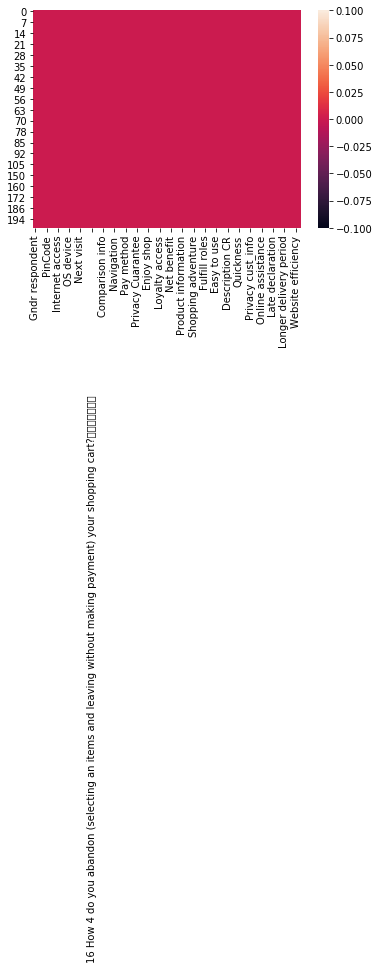

In [16]:
# Checking null values through heatmap visualization
sns.heatmap(ds.isnull())

# Getting the unique values of target columns

In [17]:
ds['Recommend retailer'].unique()

array(['Flipkart.com', 'Amazon.in, Myntra.com',
       'Amazon.in, Paytm.com, Myntra.com', 'Amazon.in, Flipkart.com',
       'Amazon.in, Paytm.com',
       'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com', 'Amazon.in',
       'Amazon.in, Flipkart.com, Myntra.com'], dtype=object)

# Checking the corelation

In [18]:
ds.corr()

Gndr respondent       Age  \
Gndr respondent                                            1.000000 -0.025363   
Age                                                       -0.025363  1.000000   
PinCode                                                    0.311948 -0.055156   
Shopping period                                            0.065882  0.004844   
Year purchase frq                                          0.127210  0.053927   
Internet access                                           -0.089500  0.039065   
Device shopping                                           -0.169250  0.219964   
Screen mobile                                             -0.035377  0.135431   
OS device                                                 -0.013198 -0.054667   
Browser                                                   -0.107140 -0.096807   
Channel                                                   -0.165589 -0.025742   
Next visit                                                 0.016751 -0.115502   
Explore time                                               0.103600 -0.019032   
Prefered Payment                                           0.003600  0.078519   
16 How 4 do you abandon (selecting an items and...         0.032194  0.066326   
Reason abandon                                            -0.073634 -0.003130   
Content understand                                         0.033267 -0.181105   
Comparison info                                            0.115769 -0.132606   
Complete info                                             -0.037374 -0.056453   
relevant info                                              0.043148 -0.118766   
Navigation                                                 0.079204 -0.185015   
Speed                                                      0.121781 -0.175645   
Interface                                                  0.115607 -0.224011   
Pay method                                                 0.116719 -0.157244   
Trust retail                                               0.041767 -0.190947   
Empathy                                                    0.028801 -0.242382   
Privacy Cuarantee                                         -0.023871 -0.240263   
Response channel                                           0.061617 -0.026483   
Discounts                                                  0.056055 -0.177049   
Enjoy shop                                                 0.079559 -0.156330   
Covinient                                                  0.119692 -0.058870   
Return policy                                              0.157174 -0.092555   
Loyalty access                                             0.061831  0.097704   
Quality information                                        0.157617  0.013342   
User satifaction                                           0.147871 -0.067001   
Net benefit                                                0.206341 -0.160361   
User satis trust                                           0.006421 -0.136582   
Offering product                                           0.133999  0.080547   
Product information                                        0.289939  0.005976   
Monetary savings                                           0.213244 -0.037993   
Convinience retailer                                       0.213069  0.079814   
Shopping adventure                                         0.068902  0.143896   
Social status                                             -0.060190 -0.145202   
Gratification                                             -0.007160 -0.217022   
Fulfill roles                                             -0.213140 -0.015156   
Value for money                                            0.194772 -0.029072   

                                                     PinCode  Shopping period  \
Gndr respondent                                     0.311948         0.065882   
Age                                                -0.055156         0.004844   
P

# Univariate Analysis

Histogram

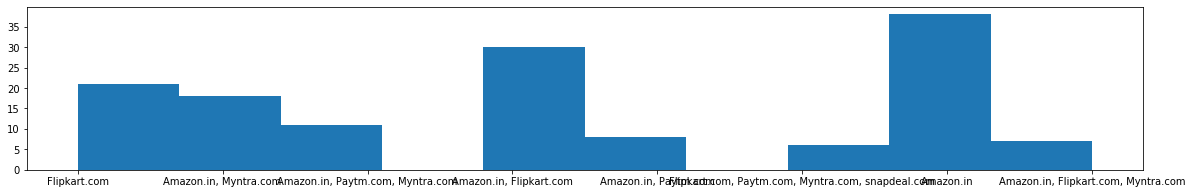

In [19]:
plt.figure(figsize=(20,3))
plt.hist(ds['Recommend retailer'])
plt.show()

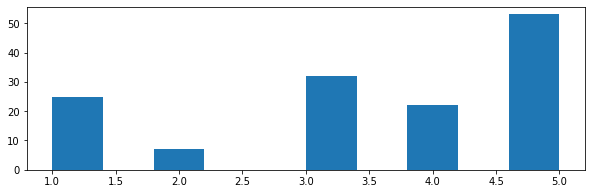

In [20]:
plt.figure(figsize=(10,3))
plt.hist(ds['Shopping period'])
plt.show()

It seems many customers are shopping since 4 years

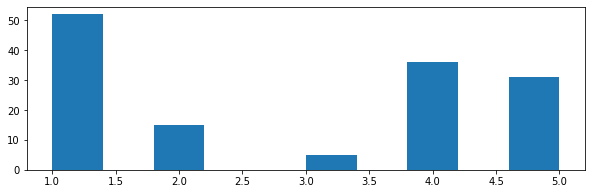

In [21]:
plt.figure(figsize=(10,3))
plt.hist(ds['Year purchase frq'])
plt.show()

many customers have purchased from the website less than 10 times in a year

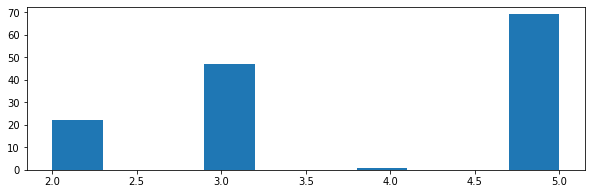

In [22]:
plt.figure(figsize=(10,3))
plt.hist(ds['Internet access'])
plt.show()

It seems many customers are using 'Mobile Internet' for shopping

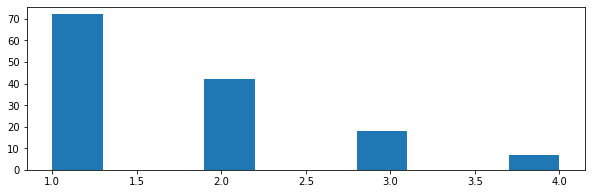

In [23]:
plt.figure(figsize=(10,3))
plt.hist(ds['Device shopping'])
plt.show()

Many customers are using 'Smartphone' for shopping

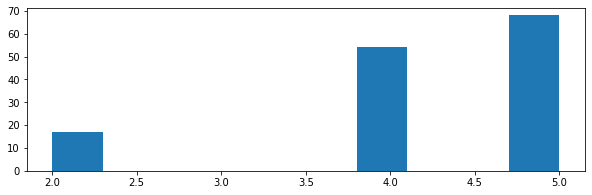

In [24]:
plt.figure(figsize=(10,3))
plt.hist(ds['Screen mobile'])
plt.show()

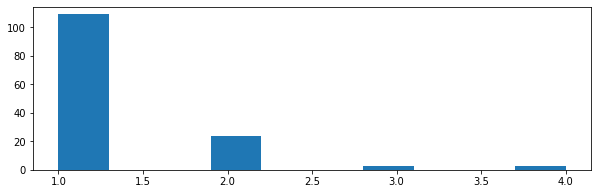

In [25]:
plt.figure(figsize=(10,3))
plt.hist(ds['Browser'])
plt.show()

It looks like many customers are using 'Google Chrome' as a browser for shopping

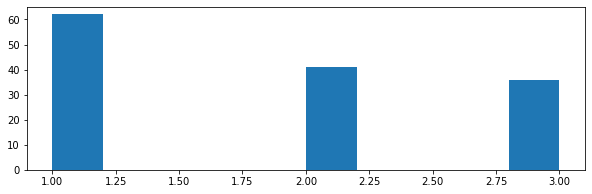

In [26]:
plt.figure(figsize=(10,3))
plt.hist(ds['OS device'])
plt.show()

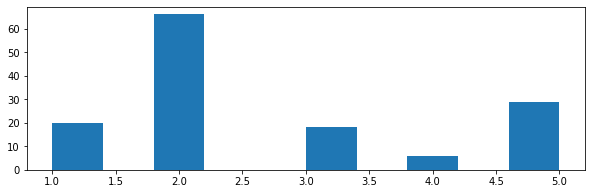

In [27]:
plt.figure(figsize=(10,3))
plt.hist(ds['Reason abandon'])
plt.show()

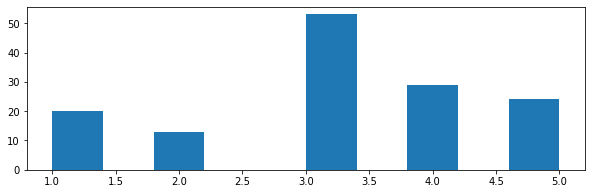

In [28]:
plt.figure(figsize=(10,3))
plt.hist(ds['Social status'])
plt.show()

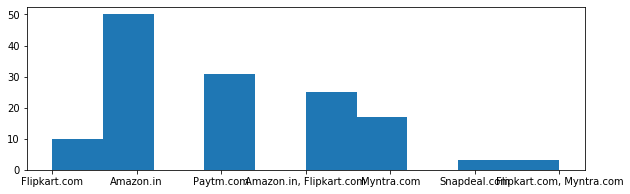

In [29]:
plt.figure(figsize=(10,3))
plt.hist(ds['Change design'])
plt.show()

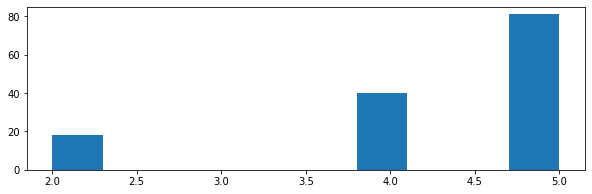

In [30]:
plt.figure(figsize=(10,3))
plt.hist(ds['Pay method'])
plt.show()

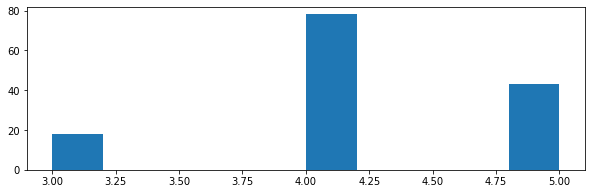

In [31]:
plt.figure(figsize=(10,3))
plt.hist(ds['Value for money'])
plt.show()

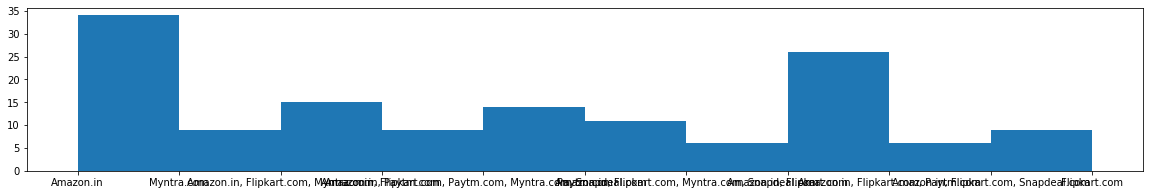

In [32]:
plt.figure(figsize=(20,3))
plt.hist(ds['Privacy cust_info'])
plt.show()

# Countplot

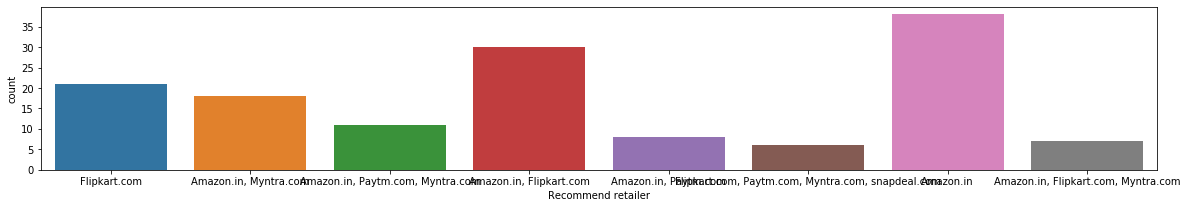

In [33]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Recommend retailer'])
plt.show()

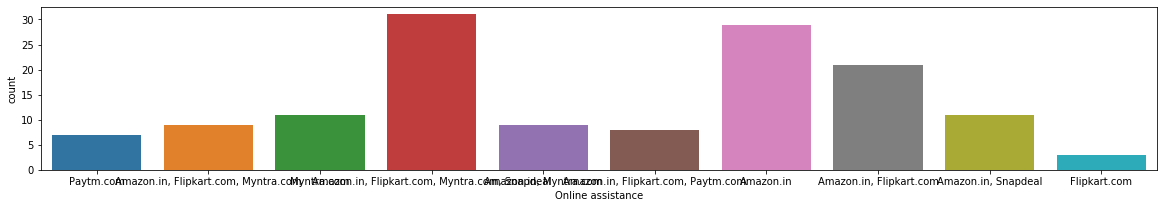

In [34]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Online assistance'])
plt.show()

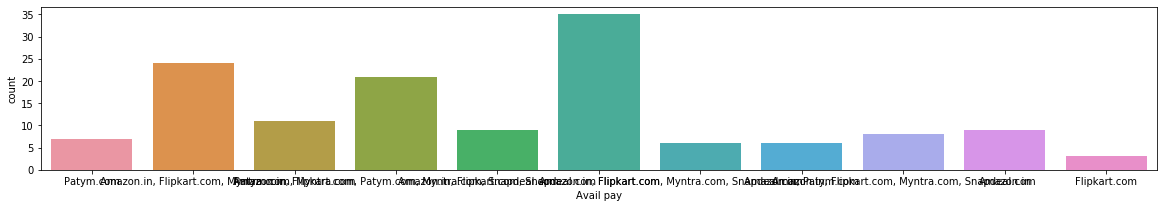

In [35]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Avail pay'])
plt.show()

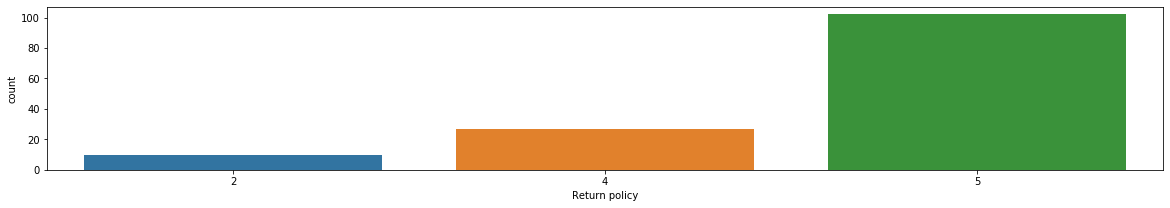

In [36]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Return policy'])
plt.show()

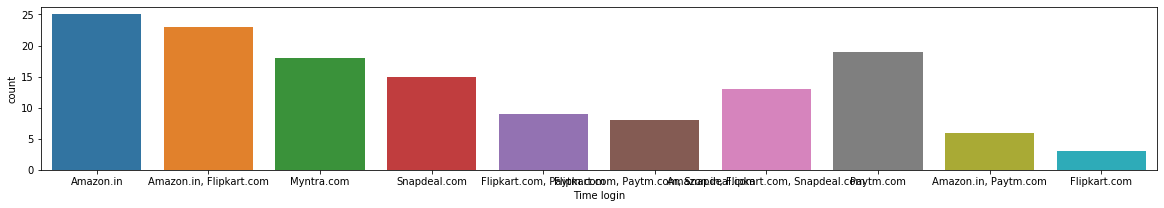

In [37]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Time login'])
plt.show()

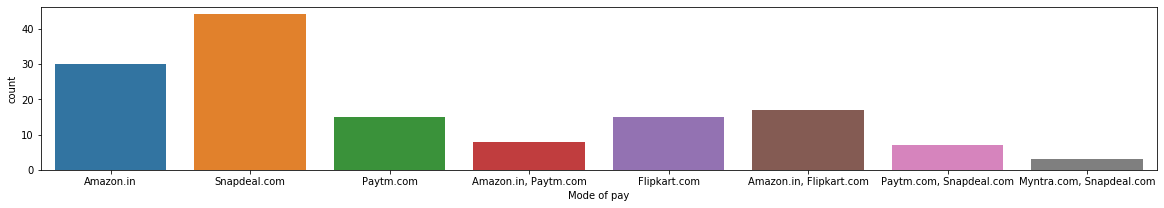

In [38]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Mode of pay'])
plt.show()

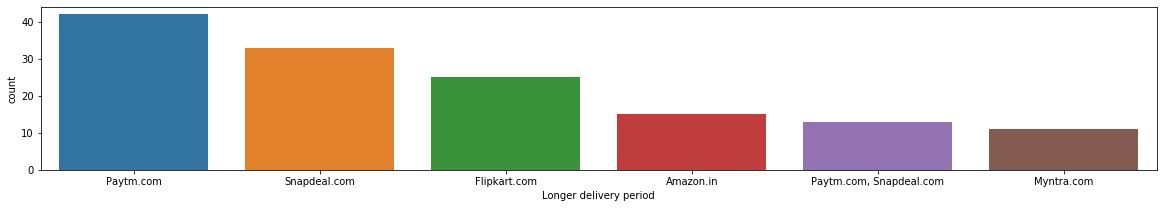

In [39]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Longer delivery period'])
plt.show()

Longer delivery period is of 'Paytm.com'

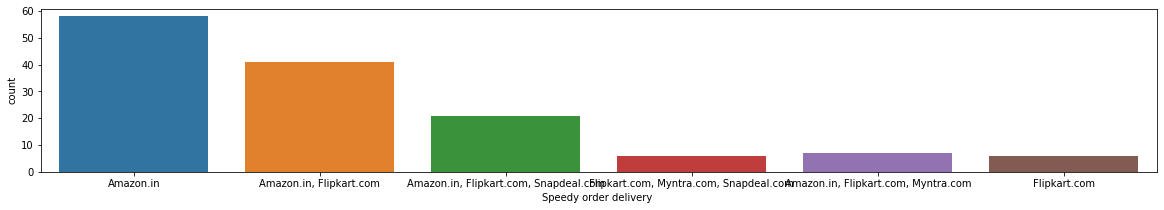

In [40]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Speedy order delivery '])
plt.show()

Speedy longer delivery is of 'Amazon'

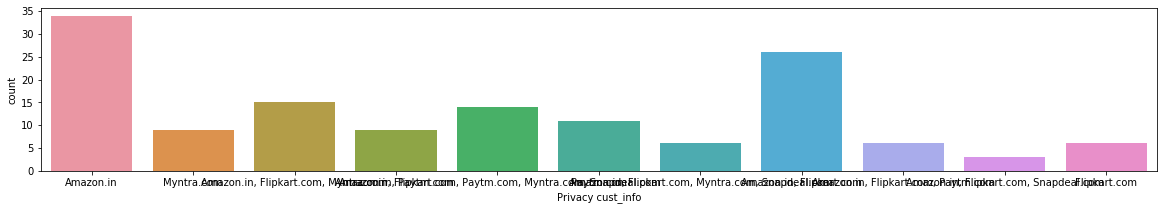

In [41]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Privacy cust_info'])
plt.show()

It looks like amazon has a good 'Customer policy information'

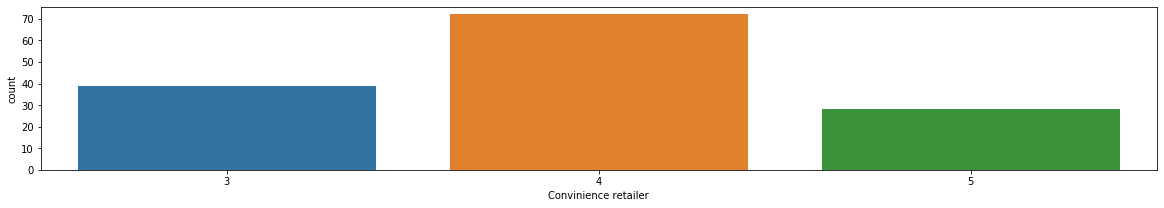

In [42]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Convinience retailer'])
plt.show()

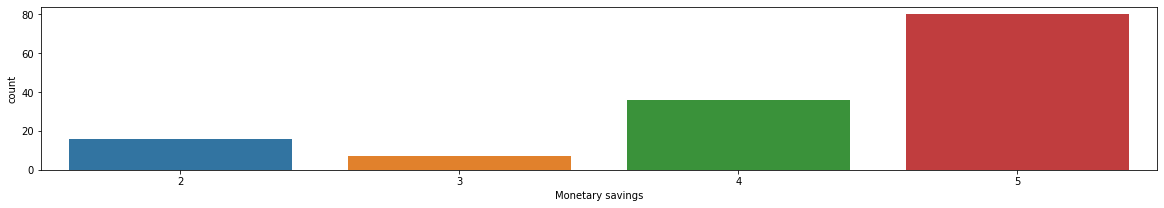

In [43]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Monetary savings'])
plt.show()

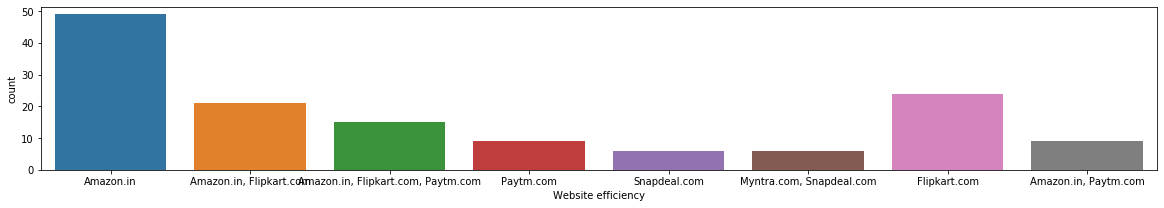

In [44]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Website efficiency'])
plt.show()

Amazon has good 'Website efficiency', it looks

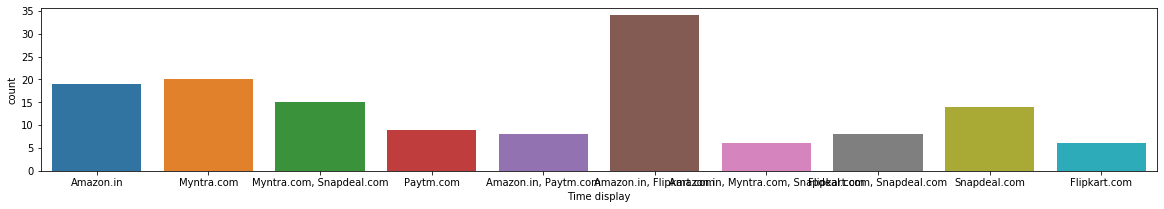

In [45]:
plt.figure(figsize=(20,3))
sns.countplot(ds['Time display'])
plt.show()

# Bivariate Analysis

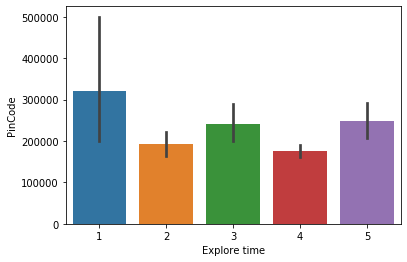

In [46]:
sns.barplot(x='Explore time', y='PinCode' , data=ds)
plt.show()

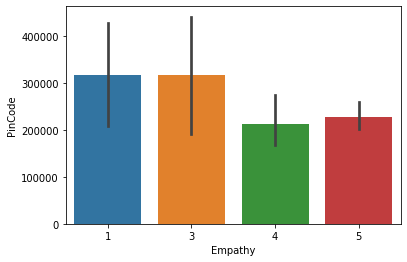

In [47]:
sns.barplot(x='Empathy', y='PinCode' , data=ds)
plt.show()

# JointPlot

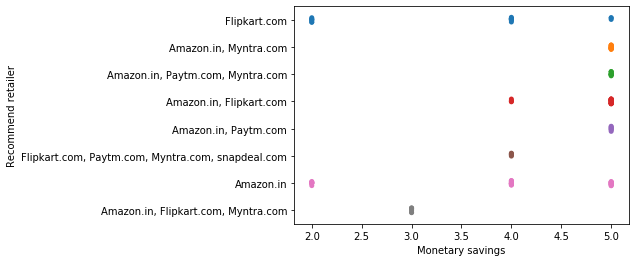

In [51]:
sns.stripplot(x='Monetary savings', y='Recommend retailer', data=ds)
plt.show()

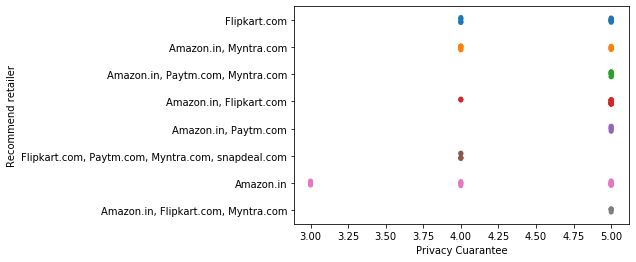

In [52]:
sns.stripplot(x='Privacy Cuarantee', y='Recommend retailer', data=ds)
plt.show()

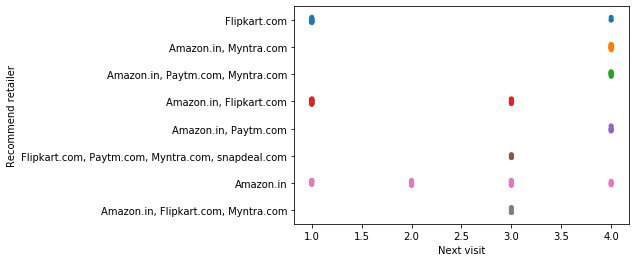

In [54]:
sns.stripplot(x='Next visit', y='Recommend retailer', data=ds)
plt.show()

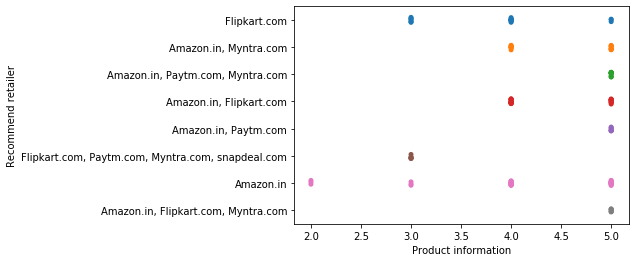

In [55]:
sns.stripplot(x='Product information', y='Recommend retailer', data=ds)
plt.show()

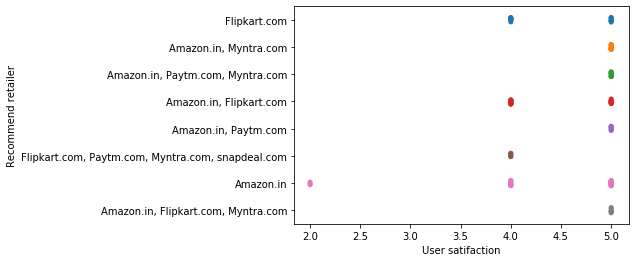

In [57]:
sns.stripplot(x='User satifaction', y='Recommend retailer', data=ds)
plt.show()

In [60]:
# using LabelEncoder to change categorical data to number data
le = LabelEncoder()
for i in ds_cat:
    ds[i] = le.fit_transform(ds[i].astype(str))

In [61]:
ds.replace(np.nan, 0, inplace=True)

# Classification algorithm for 'Recommend retailer'

# Removing outliers

In [62]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (139, 71)
After removing zscore:  (111, 71)


In [63]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Recommend retailer'])
y = ds_final['Recommend retailer']

In [64]:
y.unique()

array([3, 5, 1, 4, 7, 0, 6, 2])

In [65]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [66]:
(x.shape, y.shape)

((111, 70), (111,))

In [67]:
x.skew()

Gndr respondent          -0.631316
Age                       0.105941
City shop                 0.251710
PinCode                   1.554636
Shopping period          -0.476549
                            ...   
Mode of pay              -0.400927
Longer delivery period   -0.414871
Change design             0.221983
Frequent disruption      -0.233544
Website efficiency        0.437615
Length: 70, dtype: float64

In [68]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.log1p(x[col])

In [69]:
x.skew()

Gndr respondent          -0.631316
Age                       0.105941
City shop                 0.251710
PinCode                   0.176357
Shopping period          -0.476549
                            ...   
Mode of pay              -0.400927
Longer delivery period   -0.414871
Change design             0.221983
Frequent disruption      -0.233544
Website efficiency        0.437615
Length: 70, dtype: float64

In [70]:
x.head()

Gndr respondent       Age  City shop   PinCode  Shopping period  \
0         0.735980 -0.859645  -0.761194 -1.746764         1.056674   
1         0.735980 -0.859645  -0.132997 -0.236117         0.386441   
2        -1.358732 -0.859645   0.495201 -1.131793         0.386441   
3         0.735980 -0.859645  -1.389391  1.100618        -0.283792   
4         0.735980  0.094561   1.437497 -0.236117         1.056674   

   Year purchase frq  Internet access  Device shopping  Screen mobile  \
0           1.350114        -1.476186        -1.136971      -2.093879   
1           1.350114        -0.660979        -1.136971      -0.115832   
2          -1.057318        -0.660979        -1.136971      -0.115832   
3          -0.455460        -1.476186        -1.136971      -2.093879   
4           1.350114        -1.476186        -1.136971      -0.115832   

   OS device  ...  Online assistance  Time login  Time display  \
0   1.256572  ...          -0.538906   -1.283418      0.492957   
1   0.054163  ...           1.902670    0.607636      0.492957   
2   1.256572  ...          -0.131977    1.237987      0.837098   
3   1.256572  ...           0.681882   -0.022715      1.181238   
4   0.054163  ...           0.274952    0.292460     -0.539463   

   Late declaration  Page time  Mode of pay  Longer delivery period  \
0          1.566584   1.334414     1.029895                1.222071   
1          0.009353   0.089709    -1.551486               -0.011110   
2          0.009353   0.504610     0.292357               -0.011110   
3          0.528430   0.504610     1.029895               -0.011110   
4         -1.028801  -1.984801    -0.813949               -1.244291   

   Change design  Frequent disruption  Website efficiency  
0      -1.077698            -0.016432           -0.709672  
1       1.240605             0.895536           -1.165011  
2      -0.614037            -1.384383           -0.254333  
3      -1.077698             1.351520            1.567022  
4       1.240605            -0.928400           -1.165011  

[5 rows x 70 columns]

In [71]:
x.replace(np.nan, 0, inplace=True)

In [72]:
x.head()

Gndr respondent       Age  City shop   PinCode  Shopping period  \
0         0.735980 -0.859645  -0.761194 -1.746764         1.056674   
1         0.735980 -0.859645  -0.132997 -0.236117         0.386441   
2        -1.358732 -0.859645   0.495201 -1.131793         0.386441   
3         0.735980 -0.859645  -1.389391  1.100618        -0.283792   
4         0.735980  0.094561   1.437497 -0.236117         1.056674   

   Year purchase frq  Internet access  Device shopping  Screen mobile  \
0           1.350114        -1.476186        -1.136971      -2.093879   
1           1.350114        -0.660979        -1.136971      -0.115832   
2          -1.057318        -0.660979        -1.136971      -0.115832   
3          -0.455460        -1.476186        -1.136971      -2.093879   
4           1.350114        -1.476186        -1.136971      -0.115832   

   OS device  ...  Online assistance  Time login  Time display  \
0   1.256572  ...          -0.538906   -1.283418      0.492957   
1   0.054163  ...           1.902670    0.607636      0.492957   
2   1.256572  ...          -0.131977    1.237987      0.837098   
3   1.256572  ...           0.681882   -0.022715      1.181238   
4   0.054163  ...           0.274952    0.292460     -0.539463   

   Late declaration  Page time  Mode of pay  Longer delivery period  \
0          1.566584   1.334414     1.029895                1.222071   
1          0.009353   0.089709    -1.551486               -0.011110   
2          0.009353   0.504610     0.292357               -0.011110   
3          0.528430   0.504610     1.029895               -0.011110   
4         -1.028801  -1.984801    -0.813949               -1.244291   

   Change design  Frequent disruption  Website efficiency  
0      -1.077698            -0.016432           -0.709672  
1       1.240605             0.895536           -1.165011  
2      -0.614037            -1.384383           -0.254333  
3      -1.077698             1.351520            1.567022  
4       1.240605            -0.928400           -1.165011  

[5 rows x 70 columns]

# classification algorithm for dataset with target variable as 'Recommend retailer'

In [73]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [74]:
# algorithms used for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [75]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()

In [76]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTraeeClassifier', DT))
models.append(('RandomForestClassifier', RFC))


****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  45  is:  1.0
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Predicted values:  [0 2 3 5 6 3 2 6 6 4 1 3 1 7 3 1 0 1 7 3 1 3 1]


Accuracy score:  1.0


cross val score:  0.9363636363636363


[0.         0.11764706 0.29411765 0.41176471 0.76470588 0.88235294
 0.88235294 1.        ] [0. 0. 0. 0. 0. 0. 1. 1.] [8 7 6 4 3 2 1 0]
roc auc score:  0.11764705882352944


classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00  

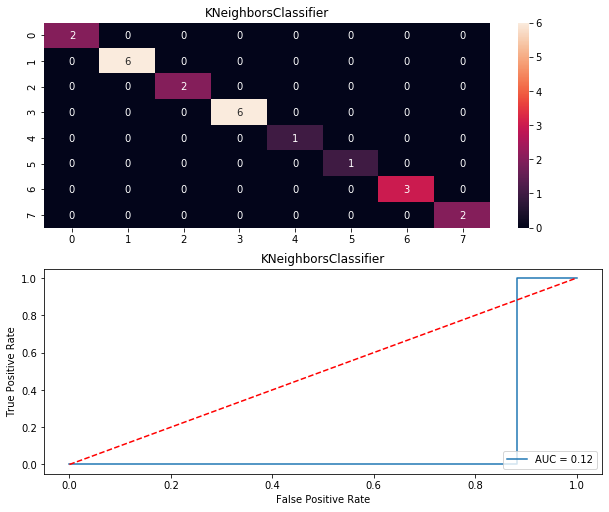

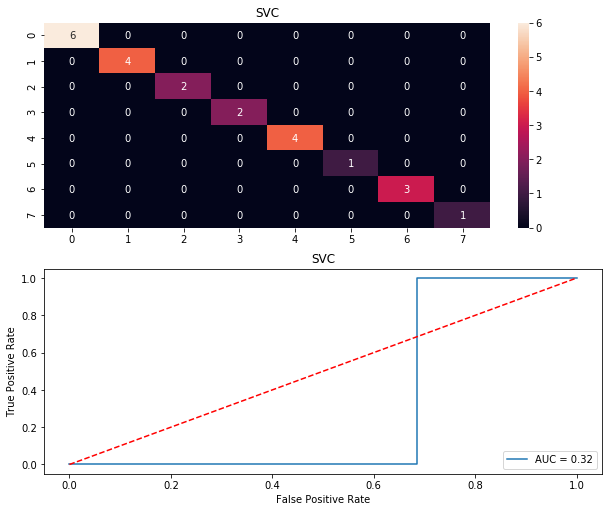

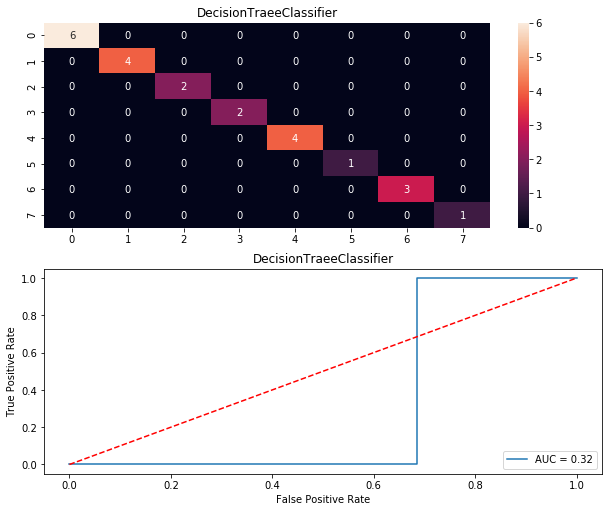

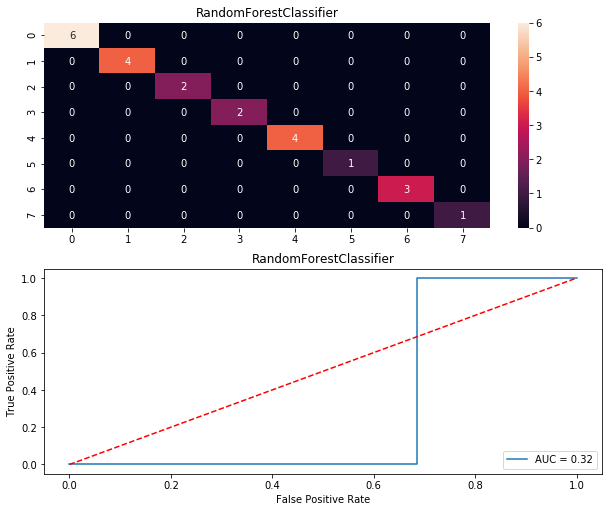

In [77]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .20)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [78]:
# Displaying the data in tabular form
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

Model  Accuracy_Score  Cross Val Score  ROC_AUC_Curve  \
0     KNeighborsClassifier           100.0        93.636364      11.764706   
1                      SVC           100.0       100.000000      31.578947   
2  DecisionTraeeClassifier           100.0       100.000000      31.578947   
3   RandomForestClassifier           100.0       100.000000      31.578947   

   RandomState  
0           45  
1           42  
2           42  
3           42

In [81]:
#Using the best model for gridsearchcv

parameters = { 'C' : [0.001, 0.01, 0.0001, 1, 10], 'kernel' : ['poly', 'rbf', 'linear'], 'gamma': [1,0.1, 0.01]}

gsc = GridSearchCV(estimator = SV, param_grid = parameters, cv=10)

In [82]:
gsc.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.0001, 1, 10],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [83]:
gsc.best_params_

{'C': 0.001, 'gamma': 1, 'kernel': 'poly'}

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=68, test_size = 0.20)
svc = SVC(C= 0.001, gamma= 1, kernel= 'poly' )
svc.fit(x_train, y_train)
y_pred =  svc.predict(x_test)
print (y_pred)

[3 6 1 3 7 4 7 6 1 1 3 1 1 1 7 6 6 0 7 5 3 0 1]


We need to predict the 'Recommended retailer'.

In [85]:
# Saving the predicted values in csv files
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_recommend_retailer.csv')

accuracy score:  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion_matrix:  [[2 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 4 0]
 [0 0 0 0 0 0 4]]
cross val score:  1.0
roc auc score:  0.125
AxesSubplot(0.125,0.808774;0.62x0.0712264)





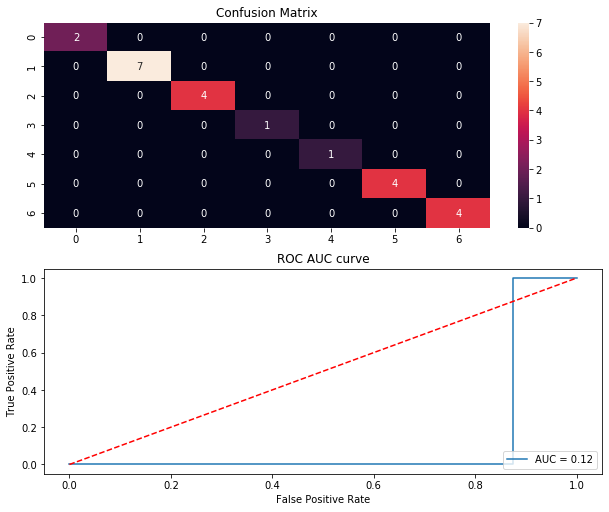

In [86]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(svc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [88]:
# saving the model 
import joblib
joblib.dump(svc, 'customer_retention.pkl')
#clf = joblib.load('project_recommend_retailer.pkl')
#clf.predict(x_test)

['customer_retention.pkl']